# **Libraries**

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **plt settings**

In [ ]:
plt.style.use('default')
sns.set(rc={'figure.figsize':(8, 6)})
sns.set_style('white')
sns.despine()

# **Data**

In [145]:
data = pd.read_csv('/content/train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_train = data[0:m].T
y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [147]:
w1 = np.random.randn(128, 784)
b1 = np.random.randn(128, 1)

w2 = np.random.randn(10, 128)
b2 = np.random.randn(10, 1)

In [148]:
def ReLu(z):
    return np.maximum(0, z)

def deriv_ReLu(z):
    return z > 0

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deriv_sigmoid(z):
    f = sigmoid(z)
    return f * (1 - f)

def forward_prop(w1, b1, w2, b2, X):
    layer_1 = np.dot(w1, X) + b1
    layer_1_act = ReLu(layer_1)
    layer_2 = np.dot(w2, layer_1_act) + b2
    layer_2_act = sigmoid(layer_2)

    return np.array(layer_1), np.array(layer_1_act), \
           np.array(layer_2), np.array(layer_2_act)

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T

    return one_hot_y

def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

def get_predictions(output):
    return np.argmax(output, 0)

def back_prop(layer_1, layer_1_act, layer_2, layer_2_act, w2, X, y):
    y = one_hot(y)
    
    dloss_on_dl2_act = 2 * (layer_2_act - y)
    dl_2_act_on_dl_2 = deriv_sigmoid(layer_2)
    dloss_on_dl_2 = dl_2_act_on_dl_2 * dloss_on_dl2_act
    dw2 = np.dot(dloss_on_dl_2, layer_1_act.transpose()) / 41000
    db2 =  np.sum(dloss_on_dl_2, axis=1) / 41000

    dloss_on_dl_1_act = np.dot(w2.transpose(), dloss_on_dl2_act)
    dl_1_act_on_l_1 = deriv_ReLu(layer_1)
    dloss_on_dl_1 = dloss_on_dl_1_act * dl_1_act_on_l_1
    dw1 = np.dot(dloss_on_dl_1, X.transpose()) / 41000
    db1 = np.sum(dloss_on_dl_1) / 41000

    return dw1, db1, dw2, db2

## **Hyper parameters**

In [149]:
epoch = 800
learning_rate = 0.1

# **Gradient descent**

In [150]:
for i in range(epoch):
    layer_1, layer_1_act, layer_2, layer_2_act = forward_prop(w1, b1, w2, b2, X_train)
    dw1, db1, dw2, db2 = back_prop(layer_1, layer_1_act, layer_2, layer_2_act, w2, X_train, y_train)

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1

    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db1

    if i % 50 == 0 or i == 499:
        predictions = get_predictions(layer_2_act)
        print('epoch:', i)
        print('accuracy:', get_accuracy(predictions, y_train))

epoch: 0
accuracy: 0.05807142857142857
epoch: 50
accuracy: 0.492952380952381
epoch: 100
accuracy: 0.6203571428571428
epoch: 150
accuracy: 0.6940238095238095
epoch: 200
accuracy: 0.7388333333333333
epoch: 250
accuracy: 0.7699523809523809
epoch: 300
accuracy: 0.7901428571428571
epoch: 350
accuracy: 0.8065238095238095
epoch: 400
accuracy: 0.8187380952380953
epoch: 450
accuracy: 0.8280714285714286
epoch: 499
accuracy: 0.8359761904761904
epoch: 500
accuracy: 0.8361904761904762
epoch: 550
accuracy: 0.8436190476190476
epoch: 600
accuracy: 0.8491428571428571
epoch: 650
accuracy: 0.8543571428571428
epoch: 700
accuracy: 0.8590714285714286
epoch: 750
accuracy: 0.8637619047619047


In [151]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, output = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(output)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# **Test**

Prediction:  [7]
Label:  7


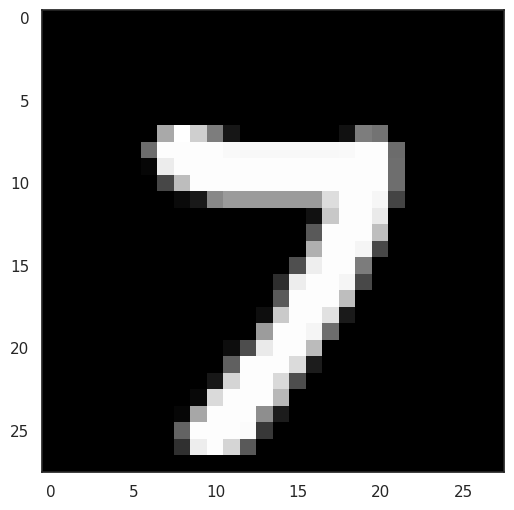

In [153]:
test_prediction(21, w1, b1, w2, b2)